In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 

from fnmatch import fnmatch


import matplotlib.pyplot as plt


# set some nicer defaults for matplotlib
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (20, 10)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = pd.read_csv('../data/MaterialInputDataMachineLearning.txt', delim_whitespace=True, header=None)
result = pd.read_csv('../data/OutputDataMachineLearning.txt', delim_whitespace=True, header=None)

In [3]:
data.drop([0, 5], axis=1, inplace=True)

In [4]:
data.head()

,1,2,3,4,6
0,9.744375e+09,0.356487,5.266641e+11,0.279271,0.3
1,6.488627e+09,0.302243,1.232113e+11,0.137124,0.3
2,1.963719e+09,0.330547,4.588572e+11,0.315956,0.3
3,9.960097e+09,0.382041,1.455963e+11,0.123606,0.3
4,6.437510e+09,0.348520,8.645652e+11,0.129599,0.3


In [5]:
data.columns = ["Young's Modulus Matrix (Pa)", "Poisson's Ratio Matrix", "Young's Modulus Fibre (Pa)", "Poisson's Ratio Fibre", "Volume Fraction"]

In [6]:
result[4] = 0

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
rf = RandomForestRegressor(n_estimators = 200)
np.mean(cross_val_score(rf, data, result[1], cv = 4))

0.92989962755753741

In [9]:
result.head()

,0,1,2,3,4,5,6,7,8,9
0,1,2.664610e+10,1.306500e+10,279349000.0,0,2.676040e+10,413994000.0,0.0,0.0,6.373300e+09
1,2,1.416630e+10,5.466300e+09,116244000.0,0,1.421720e+10,202405000.0,0.0,0.0,4.154900e+09
2,3,4.963860e+09,2.177040e+09,56934400.0,0,4.988410e+09,84753000.0,0.0,0.0,1.310140e+09
3,4,2.825700e+10,1.514920e+10,272210000.0,0,2.833100e+10,400427000.0,0.0,0.0,6.193700e+09
4,5,1.723740e+10,8.116000e+09,186127000.0,0,1.731850e+10,276928000.0,0.0,0.0,4.274870e+09


In [10]:
for i in [1,2,3,5,6,9]:
    print i, np.mean(cross_val_score(rf,data, result[i], cv = 4))

1 0.927909912597
2 0.948778074347
3 0.845452654672
5 0.929052418809
6 0.848933913668
9 0.969751758339


In [11]:
data.head()

,Young's Modulus Matrix (Pa),Poisson's Ratio Matrix,Young's Modulus Fibre (Pa),Poisson's Ratio Fibre,Volume Fraction
0,9.744375e+09,0.356487,5.266641e+11,0.279271,0.3
1,6.488627e+09,0.302243,1.232113e+11,0.137124,0.3
2,1.963719e+09,0.330547,4.588572e+11,0.315956,0.3
3,9.960097e+09,0.382041,1.455963e+11,0.123606,0.3
4,6.437510e+09,0.348520,8.645652e+11,0.129599,0.3


In [12]:
data.describe()

,Young's Modulus Matrix (Pa),Poisson's Ratio Matrix,Young's Modulus Fibre (Pa),Poisson's Ratio Fibre,Volume Fraction
count,3.000000e+02,300.000000,3.000000e+02,300.000000,300.000000
mean,5.574183e+09,0.305267,4.987511e+11,0.222166,0.400000
std,2.836223e+09,0.059083,2.654900e+11,0.073148,0.081786
min,1.078529e+09,0.201779,4.610544e+10,0.102230,0.300000
25%,2.931881e+09,0.251675,2.931493e+11,0.158937,0.300000
50%,5.475158e+09,0.312091,4.872371e+11,0.216204,0.400000
75%,8.189232e+09,0.355053,6.915839e+11,0.285937,0.500000
max,9.960097e+09,0.398134,9.739165e+11,0.349943,0.500000


In [13]:
import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.1,
          "max_depth": 3,
          "subsample": 0.8,
          'gamma':1.0,
          "silent": 1,
          "seed": 1
          }
num_boost_round = 1000

In [14]:
to_predict1 = pd.DataFrame(pd.read_csv('../data/glass-epoxy.txt', header=None, delim_whitespace=True))
to_predict1.columns = [1,2,3,4,6]

to_predict2 = pd.DataFrame(pd.read_csv('../data/boron-epoxy.txt', header=None, delim_whitespace=True))
to_predict2.columns = [1,2,3,4,6]

In [15]:
to_predict1

,1,2,3,4,6
0,4.000000e+09,0.35,7.100000e+10,0.22,0.3
1,4.000000e+09,0.35,7.100000e+10,0.22,0.4
2,4.000000e+09,0.35,7.100000e+10,0.22,0.5


In [16]:
to_predict2

,1,2,3,4,6
0,4.000000e+09,0.35,4.200000e+11,0.2,0.3
1,4.000000e+09,0.35,4.200000e+11,0.2,0.4
2,4.000000e+09,0.35,4.200000e+11,0.2,0.5


In [17]:
data.columns = [1,2,3,4,6]

In [18]:
res11 = []
res12 = []
for i in [1,2,3,5,6,9]:
    dtrain = xgb.DMatrix(data, result[i])
    gbm = xgb.train(params, dtrain, num_boost_round)
    pred11 = gbm.predict(xgb.DMatrix(to_predict1))
    pred12 = gbm.predict(xgb.DMatrix(to_predict2))
    print i, pred11
    print i, pred12
    res11.append(pred11)
    res12.append(pred12)

1 [  1.06185554e+10   1.26336236e+10   1.60911411e+10]
1 [  1.10153452e+10   1.38509773e+10   1.93974006e+10]
2 [  5.92473907e+09   6.65099059e+09   7.88430080e+09]
2 [  6.11618867e+09   6.97279898e+09   8.77801472e+09]
3 [  9.05049680e+07   1.08601536e+08   2.33572768e+08]
3 [  1.25344584e+08   1.70007360e+08   4.30473376e+08]
5 [  1.10197996e+10   1.27917404e+10   1.69210388e+10]
5 [  1.15809454e+10   1.40491581e+10   2.07421993e+10]
6 [  1.46197040e+08   2.27214448e+08   4.12427968e+08]
6 [  1.91489568e+08   3.31438144e+08   6.12167296e+08]
9 [  2.65185664e+09   3.31860659e+09   4.45752166e+09]
9 [  2.69266765e+09   3.50487987e+09   4.97846323e+09]


In [19]:
res11

[array([  1.06185554e+10,   1.26336236e+10,   1.60911411e+10], dtype=float32),
 array([  5.92473907e+09,   6.65099059e+09,   7.88430080e+09], dtype=float32),
 array([  9.05049680e+07,   1.08601536e+08,   2.33572768e+08], dtype=float32),
 array([  1.10197996e+10,   1.27917404e+10,   1.69210388e+10], dtype=float32),
 array([  1.46197040e+08,   2.27214448e+08,   4.12427968e+08], dtype=float32),
 array([  2.65185664e+09,   3.31860659e+09,   4.45752166e+09], dtype=float32)]

In [20]:
res12

[array([  1.10153452e+10,   1.38509773e+10,   1.93974006e+10], dtype=float32),
 array([  6.11618867e+09,   6.97279898e+09,   8.77801472e+09], dtype=float32),
 array([  1.25344584e+08,   1.70007360e+08,   4.30473376e+08], dtype=float32),
 array([  1.15809454e+10,   1.40491581e+10,   2.07421993e+10], dtype=float32),
 array([  1.91489568e+08,   3.31438144e+08,   6.12167296e+08], dtype=float32),
 array([  2.69266765e+09,   3.50487987e+09,   4.97846323e+09], dtype=float32)]

In [21]:
phi11 = 2*res11[5]/res11[0]
print phi11

phi12 = 2*res12[5]/res12[0]
print phi12

[ 0.49947599  0.525361    0.55403423]
[ 0.48889393  0.50608414  0.5133124 ]


In [22]:
nu_c11 = (phi11-1)/(phi11-2)
print nu_c11

nu_c12 = (phi12-1)/(phi12-2)
print nu_c12

[ 0.33356616  0.32186794  0.30842069]
[ 0.33823311  0.33061826  0.32736373]


In [23]:
E11 = 2*res11[5]*(1+nu_c11)
E12 = 2*res12[5]*(1+nu_c12)

In [24]:
print E11
print E12

[  7.07285248e+09   8.77351936e+09   1.16646267e+10]
[  7.20683418e+09   9.32731392e+09   1.32164628e+10]


In [25]:
a11 = pd.DataFrame(E11/(1e+09))
a11.columns = ['E']

a12 = pd.DataFrame(E12/(1e+09))
a12.columns = ['E']

In [26]:
a11['phi'] = pd.Series([0.3,0.4,0.5]*3)
a12['phi'] = pd.Series([0.3,0.4,0.5]*3)

In [27]:
a11

,E,phi
0,7.072853,0.3
1,8.773520,0.4
2,11.664627,0.5


In [28]:
res21 = []
res22 = []
rf = RandomForestRegressor(n_estimators = 200)
for i in [1,2,3,5,6,9]:
    rf.fit(data, result[i])
    pred21 = rf.predict(to_predict1)
    pred22 = rf.predict(to_predict2)
    print i, pred21
    print i, pred22
    res21.append(pred21)
    res22.append(pred22)

1 [  1.08123650e+10   1.30378730e+10   1.72842960e+10]
1 [  1.09069860e+10   1.34271685e+10   1.83914760e+10]
2 [  5.90420045e+09   6.64081675e+09   8.03714950e+09]
2 [  5.96130055e+09   6.84434085e+09   8.47770200e+09]
3 [  1.25809137e+08   1.56610989e+08   2.36404701e+08]
3 [  1.40472511e+08   1.77143228e+08   3.95606322e+08]
5 [  1.08802630e+10   1.33052110e+10   1.73704225e+10]
5 [  1.10514135e+10   1.34898990e+10   1.93019050e+10]
6 [  1.81491260e+08   2.54992470e+08   3.83126630e+08]
6 [  1.86252255e+08   2.93538735e+08   5.80077950e+08]
9 [  2.70618925e+09   3.41689965e+09   4.49729210e+09]
9 [  2.70695090e+09   3.43278800e+09   4.74690275e+09]


In [29]:
res21

[array([  1.08123650e+10,   1.30378730e+10,   1.72842960e+10]),
 array([  5.90420045e+09,   6.64081675e+09,   8.03714950e+09]),
 array([  1.25809137e+08,   1.56610989e+08,   2.36404701e+08]),
 array([  1.08802630e+10,   1.33052110e+10,   1.73704225e+10]),
 array([  1.81491260e+08,   2.54992470e+08,   3.83126630e+08]),
 array([  2.70618925e+09,   3.41689965e+09,   4.49729210e+09])]

In [30]:
res22

[array([  1.09069860e+10,   1.34271685e+10,   1.83914760e+10]),
 array([  5.96130055e+09,   6.84434085e+09,   8.47770200e+09]),
 array([  1.40472511e+08,   1.77143228e+08,   3.95606322e+08]),
 array([  1.10514135e+10,   1.34898990e+10,   1.93019050e+10]),
 array([  1.86252255e+08,   2.93538735e+08,   5.80077950e+08]),
 array([  2.70695090e+09,   3.43278800e+09,   4.74690275e+09])]

In [31]:
phi21 = 2*res21[5]/res21[0]
print phi21

phi22 = 2*res22[5]/res22[0]
print phi22

[ 0.50057305  0.52414986  0.52039054]
[ 0.49637011  0.51131972  0.51620683]


In [32]:
nu_c21 = (phi21-1)/(phi21-2)
print nu_c21

nu_c22 = (phi22-1)/(phi22-2)
print nu_c22

[ 0.33307855  0.32242443  0.32414598]
[ 0.33494272  0.32826409  0.32605162]


In [33]:
E21 = 2*res21[5]*(1+nu_c21)
E22 = 2*res22[5]*(1+nu_c22)

In [34]:
print E21
print E22

[  7.21512567e+09   9.03718315e+09   1.19101425e+10]
[  7.22724882e+09   9.11929808e+09   1.25892762e+10]


In [35]:
a21 = pd.DataFrame(E21/(1e+9))
a21.columns = ['E']

a22 = pd.DataFrame(E22/(1e+9))
a22.columns = ['E']

In [36]:
a21['phi'] = pd.Series([0.3,0.4,0.5]*3)
a22['phi'] = pd.Series([0.3,0.4,0.5]*3)

In [37]:
a21

,E,phi
0,7.215126,0.3
1,9.037183,0.4
2,11.910143,0.5


In [38]:
a22

,E,phi
0,7.227249,0.3
1,9.119298,0.4
2,12.589276,0.5


In [39]:
a31 = pd.DataFrame(a11['phi'])
a31['E'] = (a11['E'] + a21['E'])/2
a31 = a31[['E','phi']]
a31

,E,phi
0,7.143989,0.3
1,8.905351,0.4
2,11.787385,0.5


In [40]:
a32 = pd.DataFrame(a12['phi'])
a32['E'] = (a12['E'] + a22['E'])/2
a32 = a32[['E','phi']]
a32

,E,phi
0,7.217042,0.3
1,9.223306,0.4
2,12.902870,0.5


In [41]:
a31.loc[a31.shape[0]] = [6.7, 0.3]
a31.loc[a31.shape[0]] = [8.37, 0.4]
a31.loc[a31.shape[0]] = [10.92, 0.5]

a32.loc[a32.shape[0]] = [7.709, 0.3]
a32.loc[a32.shape[0]] = [9.16, 0.4]
a32.loc[a32.shape[0]] = [12.91, 0.5]

In [42]:
a1 = pd.concat([a11, a21, a31], ignore_index=True)
a1

,E,phi
0,7.072853,0.3
1,8.773520,0.4
2,11.664627,0.5
3,7.215126,0.3
4,9.037183,0.4
5,11.910143,0.5
6,7.143989,0.3
7,8.905351,0.4
8,11.787385,0.5
9,6.700000,0.3


In [43]:
a2 = pd.concat([a12, a22, a32], ignore_index=True)
a2

,E,phi
0,7.206834,0.3
1,9.327314,0.4
2,13.216463,0.5
3,7.227249,0.3
4,9.119298,0.4
5,12.589276,0.5
6,7.217042,0.3
7,9.223306,0.4
8,12.902870,0.5
9,7.709000,0.3


In [44]:
composite = [['Ensemble (ML)', 'XGB (ML)', 'FEM', 'RF (ML)']]
colors = ['g', 'r', 'b', 'm']
markers = ['o', 's', '^', 'D']

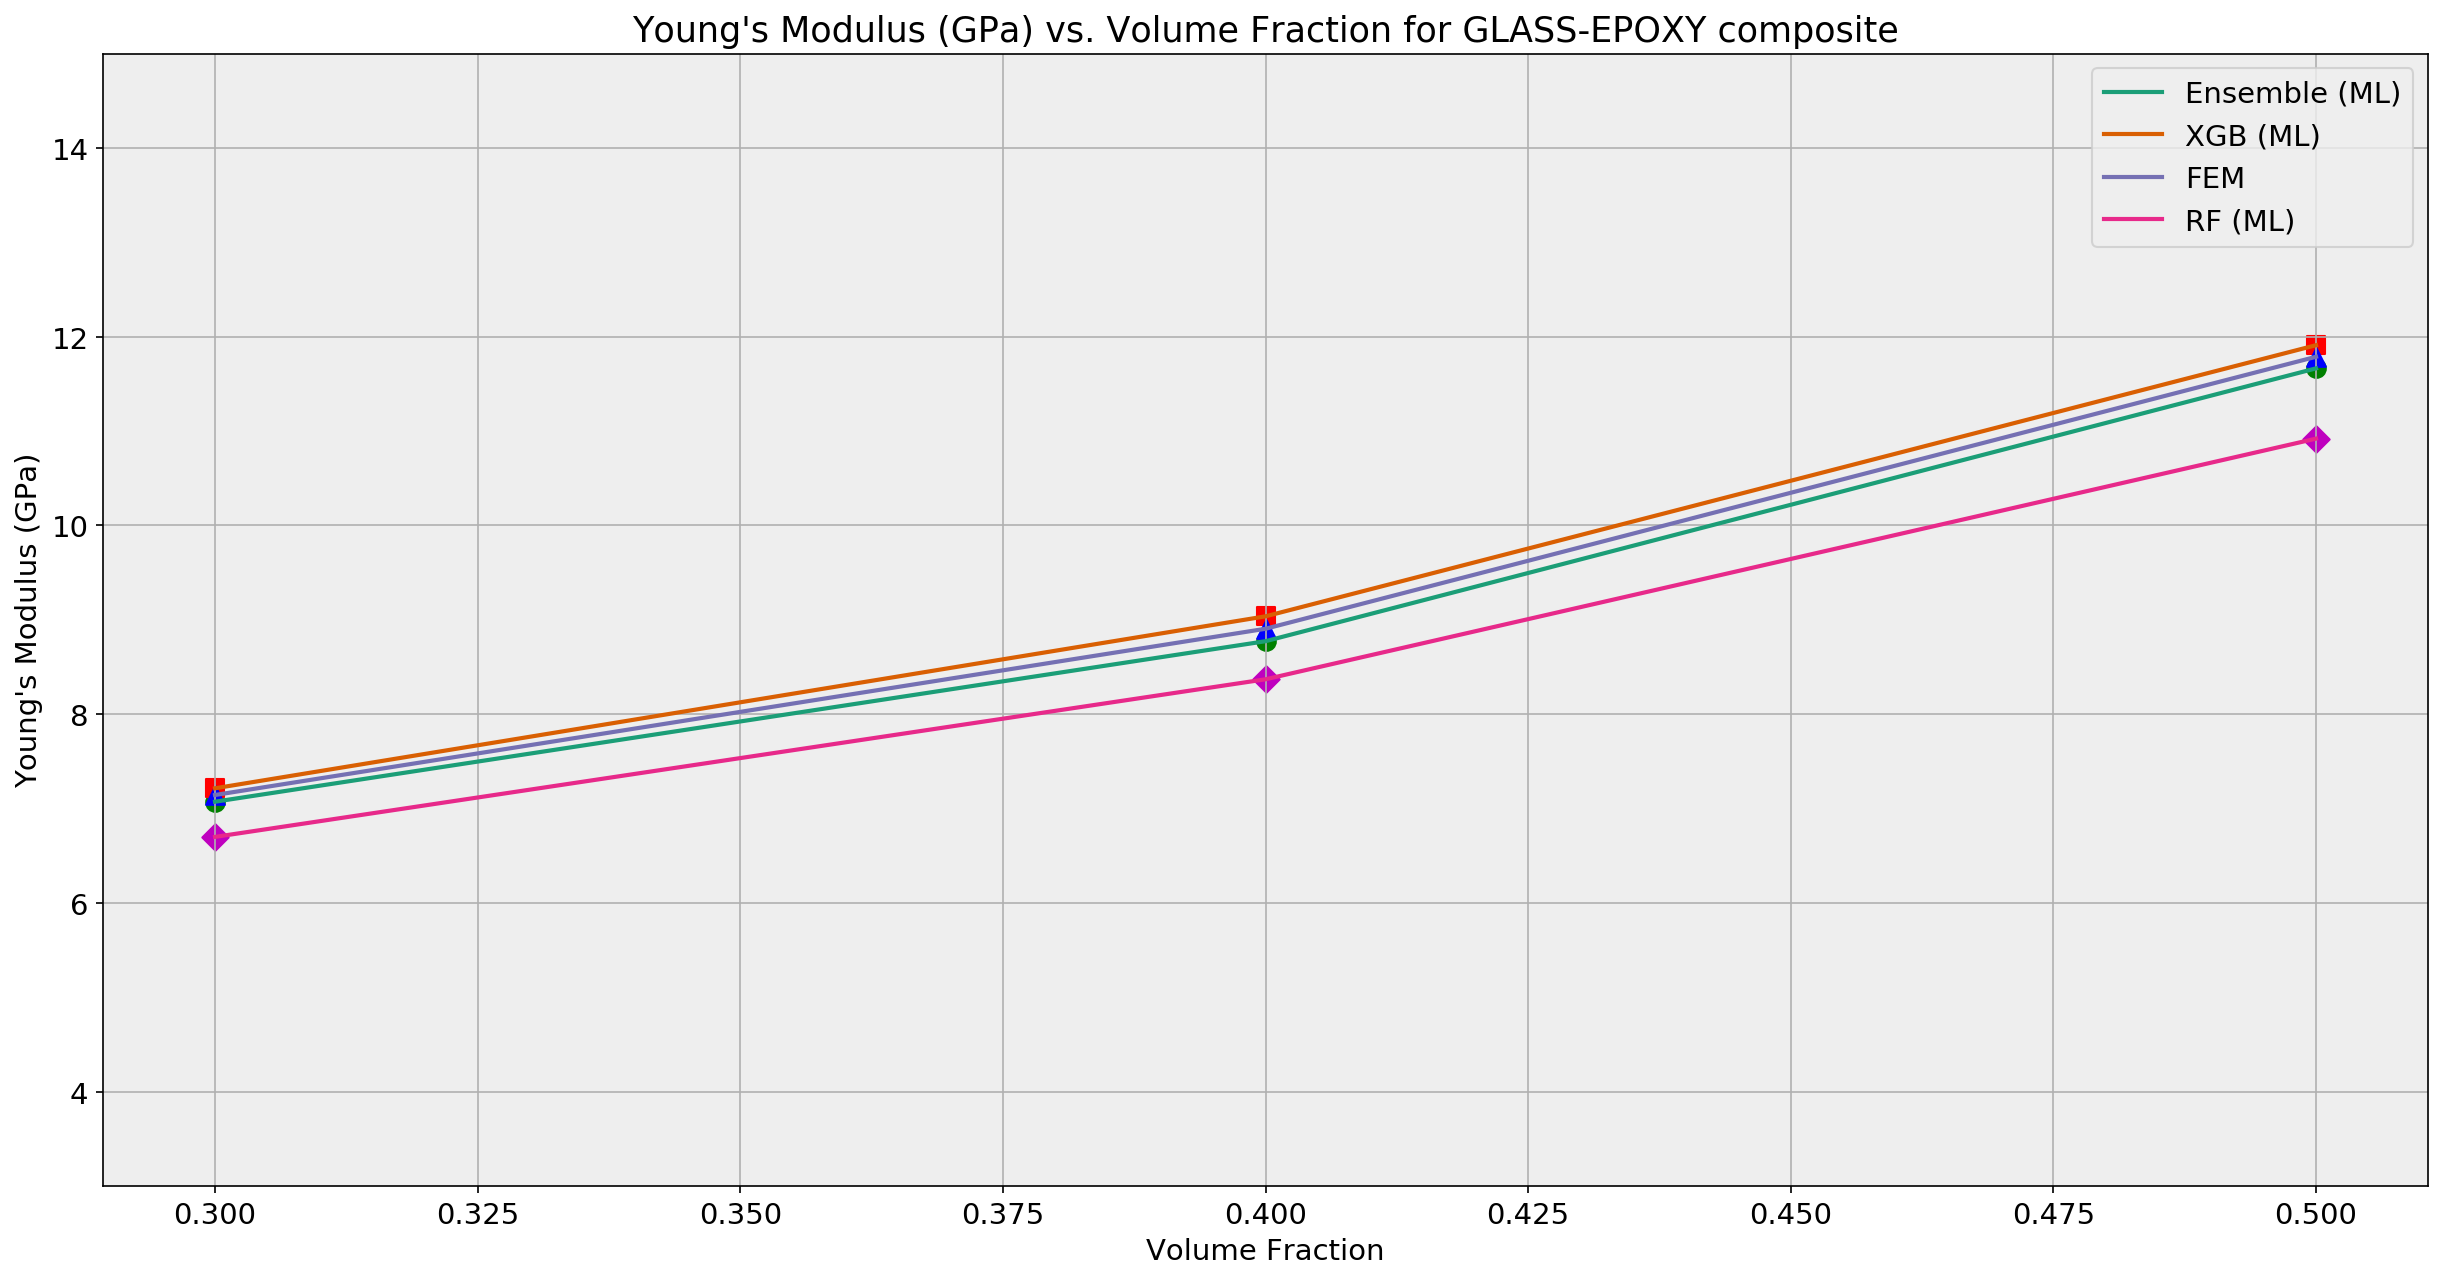

In [45]:
for i in range(0, len(composite[0])*3, 3):
    plt.plot(a1['phi'][i:i+3], a1['E'][i:i+3])
plt.legend(composite[0])
for i in range(0, len(composite[0])*3, 3):
    plt.scatter(a1[i:i+3]['phi'], a1[i:i+3]['E'], color=colors[i/3], marker=markers[i/3], s=80)
plt.ylim(3,15)
plt.xlabel("Volume Fraction")
plt.ylabel("Young's Modulus (GPa)")
plt.title("Young's Modulus (GPa) vs. Volume Fraction for GLASS-EPOXY composite")
plt.show()

In [46]:
print 'For GLASS-EPOXY:'
for i in range(0,3):
    print 'phi = ' + str(a1.loc[i]['phi'])
    print 'XGB: ' + str(round(abs(a1.loc[i]['E'] - a1.loc[6+i]['E'])*100/a1.loc[6+i]['E'], 2)) + '%'
    print 'RF: ' + str(round(abs(a1.loc[i+3]['E'] - a1.loc[6+i]['E'])*100/a1.loc[6+i]['E'], 2)) + '%'
    print

For GLASS-EPOXY:
phi = 0.3
XGB: 1.0%
RF: 1.0%

phi = 0.4
XGB: 1.48%
RF: 1.48%

phi = 0.5
XGB: 1.04%
RF: 1.04%



In [47]:
composite = [['XGB (ML)', 'RF (ML)', 'Ensemble (ML)', 'FEM']]

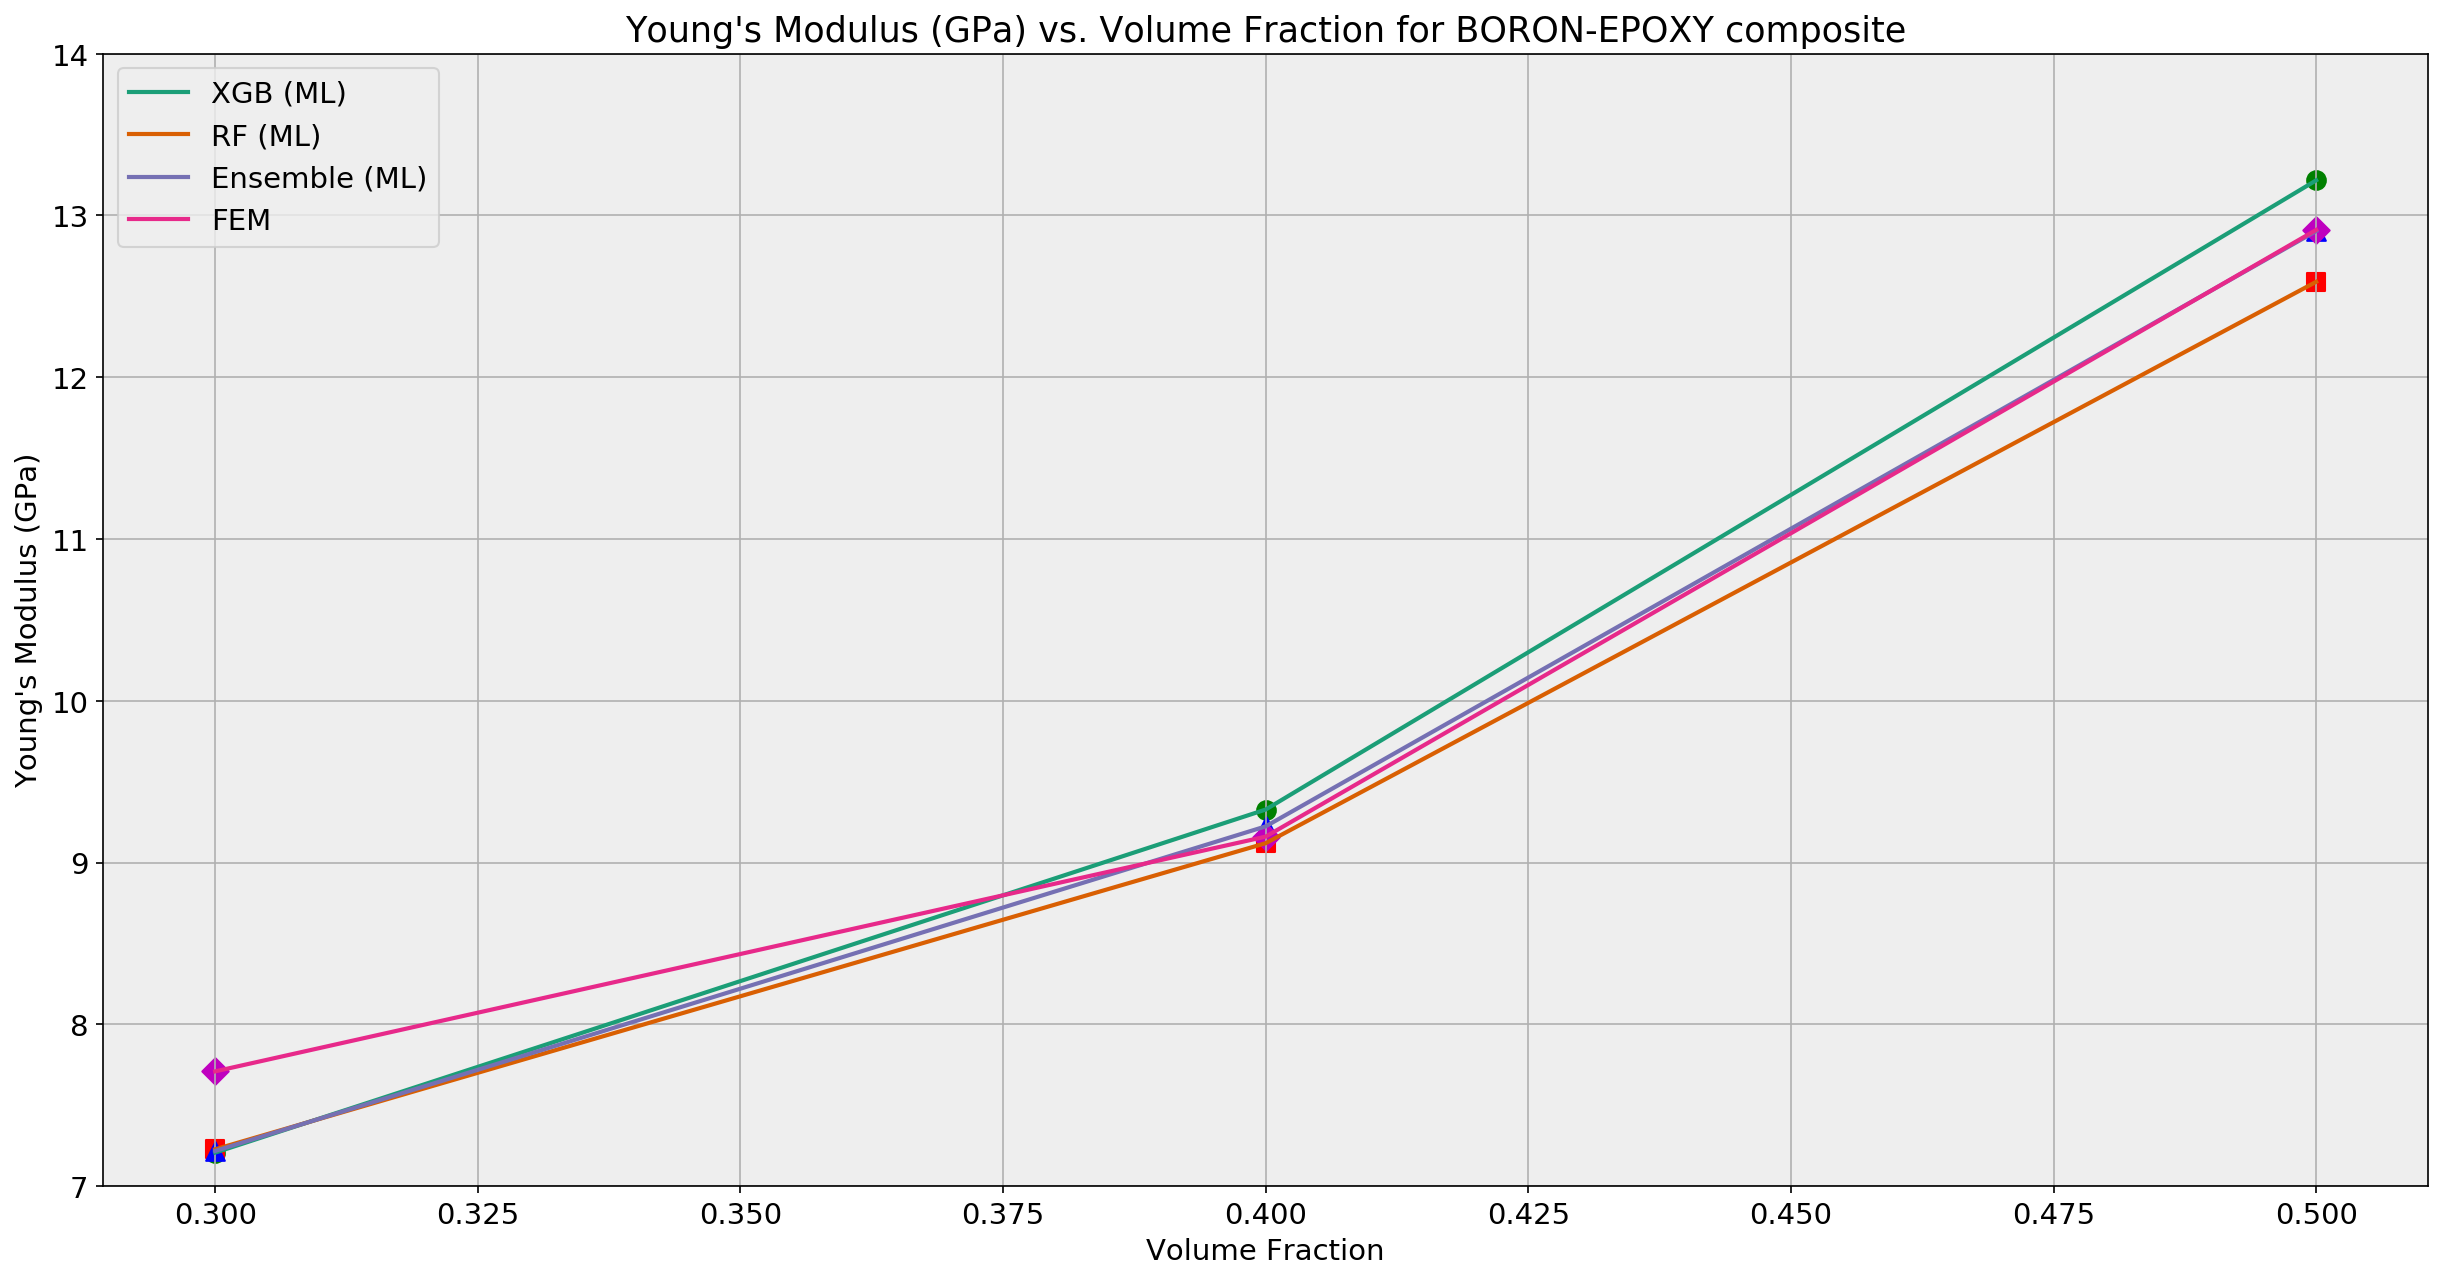

In [48]:
for i in range(0, len(composite[0])*3, 3):
    plt.plot(a2['phi'][i:i+3], a2['E'][i:i+3])
plt.legend(composite[0])
for i in range(0, len(composite[0])*3, 3):
    plt.scatter(a2[i:i+3]['phi'], a2[i:i+3]['E'], color=colors[i/3], marker=markers[i/3], s=80)
plt.ylim(7,14)
plt.xlabel("Volume Fraction")
plt.ylabel("Young's Modulus (GPa)")
plt.title("Young's Modulus (GPa) vs. Volume Fraction for BORON-EPOXY composite")
plt.show()

In [49]:
print 'For BORON-EPOXY:'
for i in range(0,3):
    print 'phi = ' + str(a2.loc[i]['phi'])
    print 'XGB: ' + str(round(abs(a2.loc[i]['E'] - a2.loc[6+i]['E'])*100/a2.loc[6+i]['E'], 2)) + '%'
    print 'RF: ' + str(round(abs(a2.loc[i+3]['E'] - a2.loc[6+i]['E'])*100/a2.loc[6+i]['E'], 2)) + '%'
    print

For BORON-EPOXY:
phi = 0.3
XGB: 0.14%
RF: 0.14%

phi = 0.4
XGB: 1.13%
RF: 1.13%

phi = 0.5
XGB: 2.43%
RF: 2.43%



In [50]:
mu11 = pd.DataFrame(a11['phi'])
mu11['mu'] = res11[5]/1e+09
mu11 = mu11[['mu', 'phi']]
mu11

,mu,phi
0,2.651857,0.3
1,3.318607,0.4
2,4.457521,0.5


In [51]:
mu21 = pd.DataFrame(a21['phi'])
mu21['mu'] = res21[5]/1e+09
mu21 = mu21[['mu', 'phi']]
mu21

,mu,phi
0,2.706189,0.3
1,3.416900,0.4
2,4.497292,0.5


In [52]:
mu12 = pd.DataFrame(a12['phi'])
mu12['mu'] = res12[5]/1e+09
mu12 = mu12[['mu', 'phi']]
mu12

,mu,phi
0,2.692668,0.3
1,3.504880,0.4
2,4.978463,0.5


In [53]:
mu22 = pd.DataFrame(a22['phi'])
mu22['mu'] = res22[5]/1e+09
mu22 = mu22[['mu', 'phi']]
mu22

,mu,phi
0,2.706951,0.3
1,3.432788,0.4
2,4.746903,0.5


In [54]:
mu31 = pd.DataFrame(a11['phi'])
mu31['mu'] = (mu11['mu'] + mu21['mu'])/2
mu31 = mu31[['mu','phi']]
mu31

,mu,phi
0,2.679023,0.3
1,3.367753,0.4
2,4.477407,0.5


In [55]:
mu32 = pd.DataFrame(a11['phi'])
mu32['mu'] = (mu12['mu'] + mu22['mu'])/2
mu32 = mu32[['mu','phi']]
mu32

,mu,phi
0,2.699809,0.3
1,3.468834,0.4
2,4.862683,0.5


In [56]:
mu31.loc[mu31.shape[0]] = [2.5, 0.3]
mu31.loc[mu31.shape[0]] = [3.15, 0.4]
mu31.loc[mu31.shape[0]] = [4.14, 0.5]

mu32.loc[mu32.shape[0]] = [2.648, 0.3]
mu32.loc[mu32.shape[0]] = [3.44, 0.4]
mu32.loc[mu32.shape[0]] = [4.87, 0.5]

In [57]:
mu1 = pd.concat([mu11, mu21, mu31], ignore_index=True)
mu1

,mu,phi
0,2.651857,0.3
1,3.318607,0.4
2,4.457521,0.5
3,2.706189,0.3
4,3.416900,0.4
5,4.497292,0.5
6,2.679023,0.3
7,3.367753,0.4
8,4.477407,0.5
9,2.500000,0.3


In [58]:
mu2 = pd.concat([mu12, mu22, mu32], ignore_index=True)
mu2

,mu,phi
0,2.692668,0.3
1,3.504880,0.4
2,4.978463,0.5
3,2.706951,0.3
4,3.432788,0.4
5,4.746903,0.5
6,2.699809,0.3
7,3.468834,0.4
8,4.862683,0.5
9,2.648000,0.3


In [59]:
composite = [['Ensemble (ML)', 'XGB (ML)', 'FEM', 'RF (ML)']]

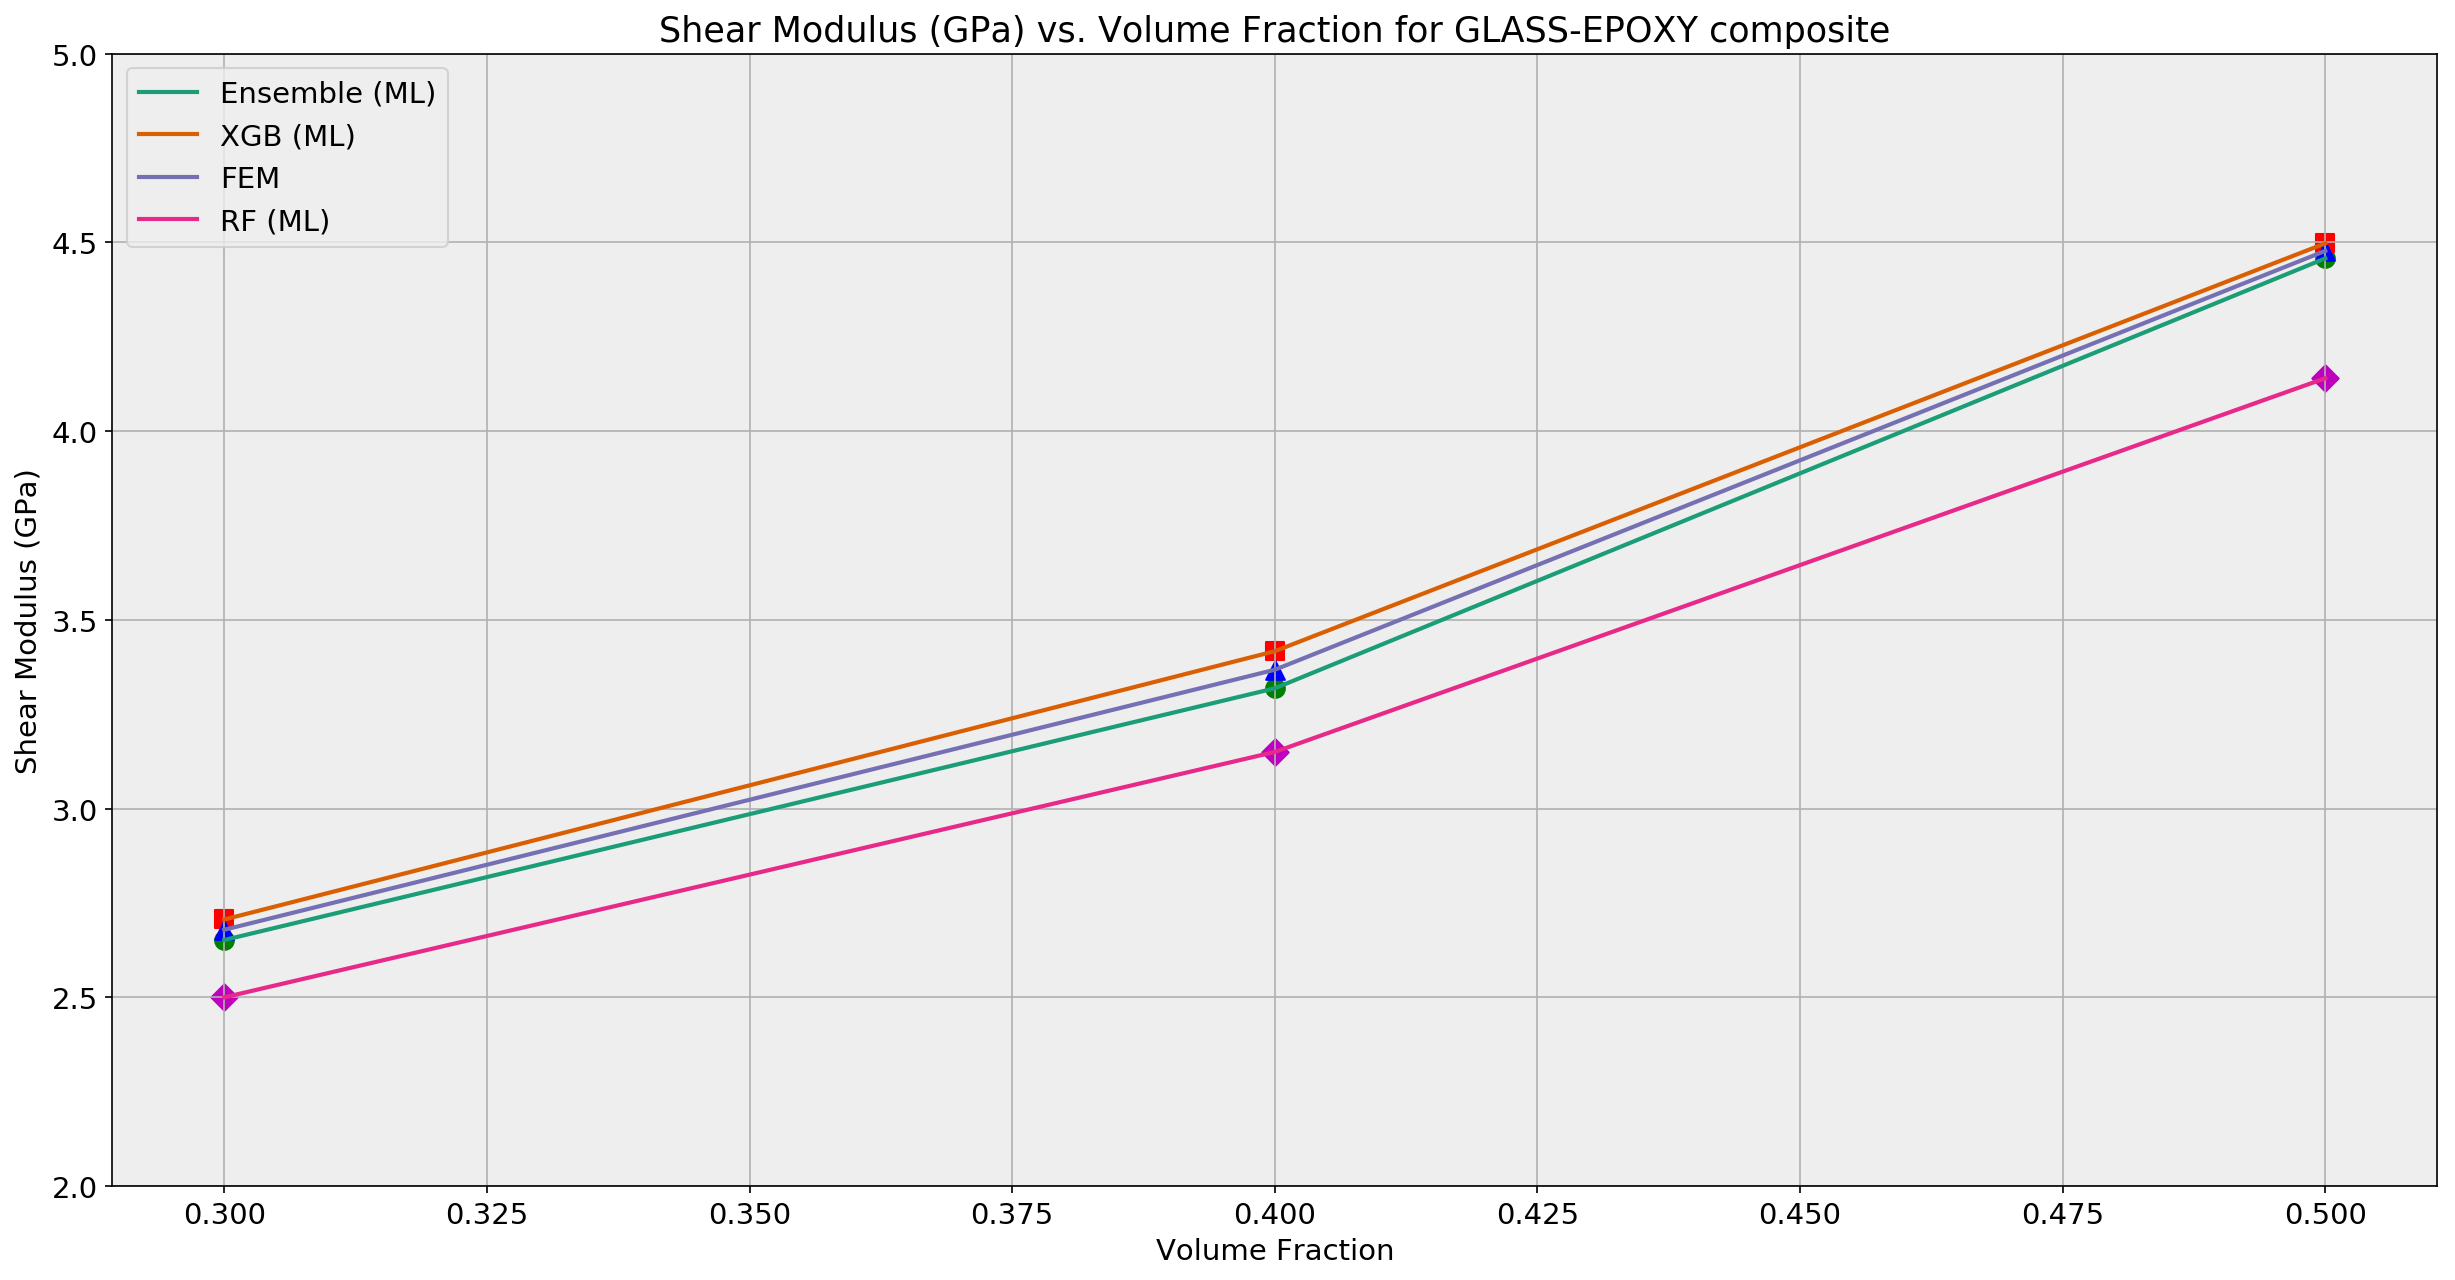

In [60]:
for i in range(0, len(composite[0])*3, 3):
    plt.plot(mu1['phi'][i:i+3], mu1['mu'][i:i+3])
plt.legend(composite[0])
for i in range(0, len(composite[0])*3, 3):
    plt.scatter(mu1[i:i+3]['phi'], mu1[i:i+3]['mu'], color=colors[i/3], marker=markers[i/3], s=80)
plt.ylim(2, 5)
plt.xlabel("Volume Fraction")
plt.ylabel("Shear Modulus (GPa)")
plt.title("Shear Modulus (GPa) vs. Volume Fraction for GLASS-EPOXY composite")
plt.show()

In [61]:
print 'For GLASS-EPOXY:'
for i in range(0,3):
    print 'phi = ' + str(mu1.loc[i]['phi'])
    print 'XGB: ' + str(round(abs(mu1.loc[i]['mu'] - mu1.loc[6+i]['mu'])*100/mu1.loc[6+i]['mu'], 2)) + '%'
    print 'RF: ' + str(round(abs(mu1.loc[i+3]['mu'] - mu1.loc[6+i]['mu'])*100/mu1.loc[6+i]['mu'], 2)) + '%'
    print

For GLASS-EPOXY:
phi = 0.3
XGB: 1.01%
RF: 1.01%

phi = 0.4
XGB: 1.46%
RF: 1.46%

phi = 0.5
XGB: 0.44%
RF: 0.44%



In [62]:
composite = [['XGB (ML)', 'RF (ML)', 'Ensemble (ML)', 'FEM']]

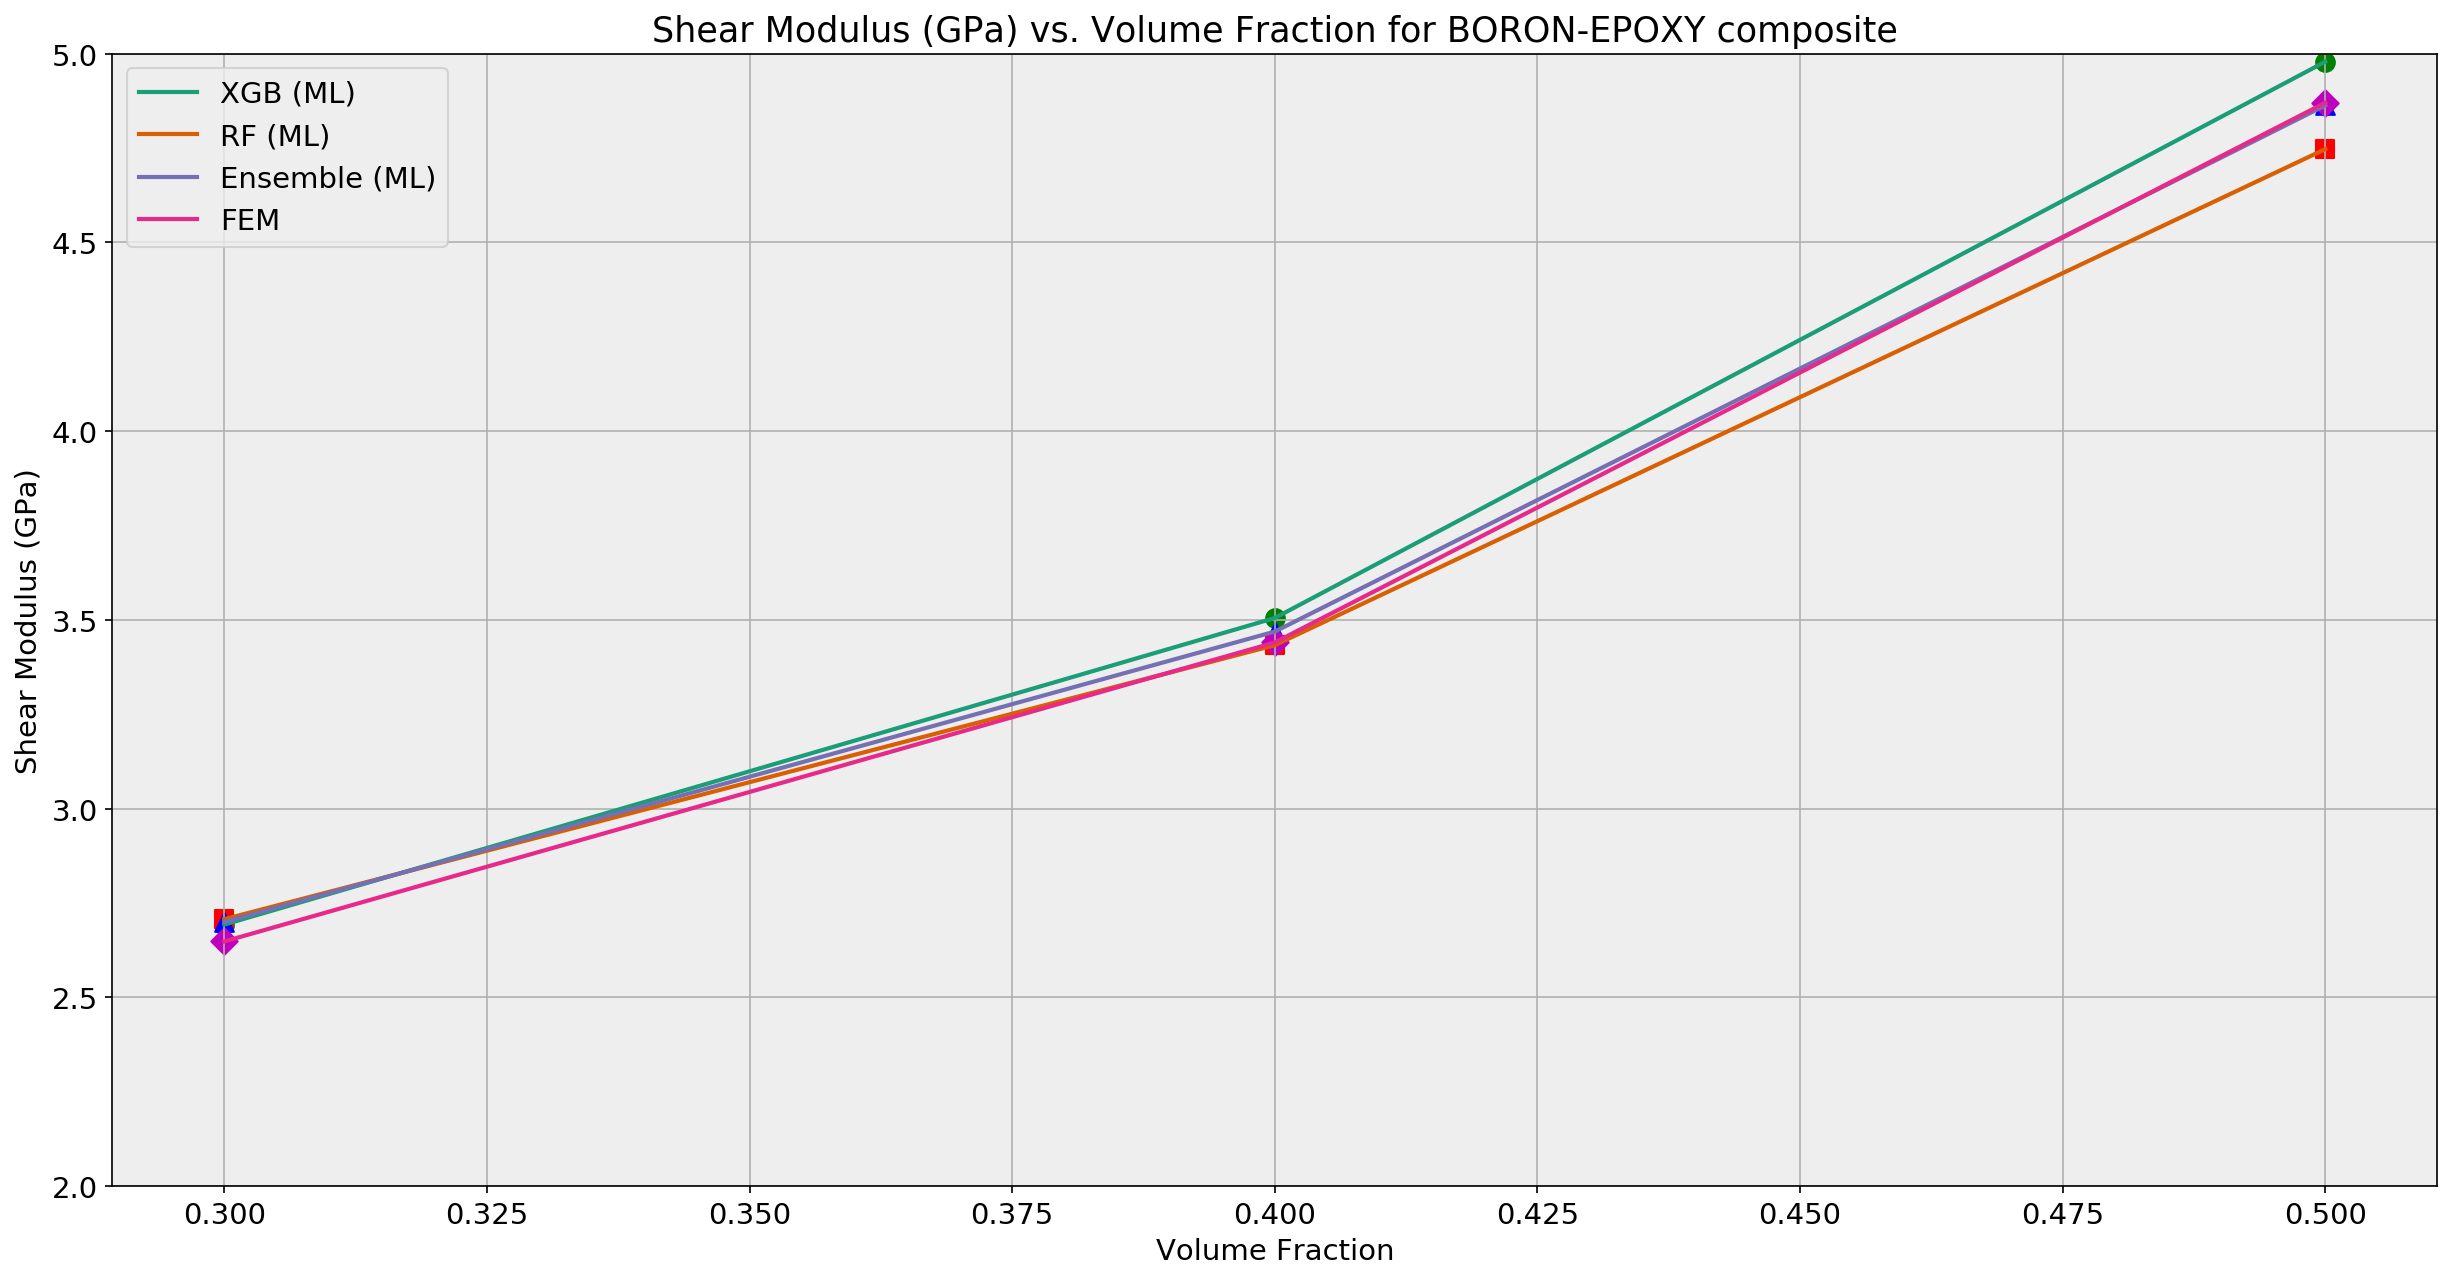

In [63]:
for i in range(0, len(composite[0])*3, 3):
    plt.plot(mu2['phi'][i:i+3], mu2['mu'][i:i+3])
plt.legend(composite[0])
for i in range(0, len(composite[0])*3, 3):
    plt.scatter(mu2[i:i+3]['phi'], mu2[i:i+3]['mu'], color=colors[i/3], marker=markers[i/3], s=80)
plt.ylim(2, 5)
plt.xlabel("Volume Fraction")
plt.ylabel("Shear Modulus (GPa)")
plt.title("Shear Modulus (GPa) vs. Volume Fraction for BORON-EPOXY composite")
plt.show()

In [64]:
print 'For BORON-EPOXY:'
for i in range(0,3):
    print 'phi = ' + str(mu2.loc[i]['phi'])
    print 'XGB: ' + str(round(abs(mu2.loc[i]['mu'] - mu2.loc[6+i]['mu'])*100/mu2.loc[6+i]['mu'], 2)) + '%'
    print 'RF: ' + str(round(abs(mu2.loc[i+3]['mu'] - mu2.loc[6+i]['mu'])*100/mu2.loc[6+i]['mu'], 2)) + '%'
    print

For BORON-EPOXY:
phi = 0.3
XGB: 0.26%
RF: 0.26%

phi = 0.4
XGB: 1.04%
RF: 1.04%

phi = 0.5
XGB: 2.38%
RF: 2.38%

